In [1]:
import snntorch as snn
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from neurons.izhikevichModel import Izhikevich
from neurons.izhikevich import Izhikevich as IZH
from neurons.lif import Leaky

In [2]:
leaky = Leaky(0.95)
memList = []
mem = 0
t_max = 100
input_ = np.array([0.1 if i < 50 else 0 for i in range(t_max)])

for i in range(t_max):
    spk, mem = leaky(input_[i], mem)
    memList.append(mem)

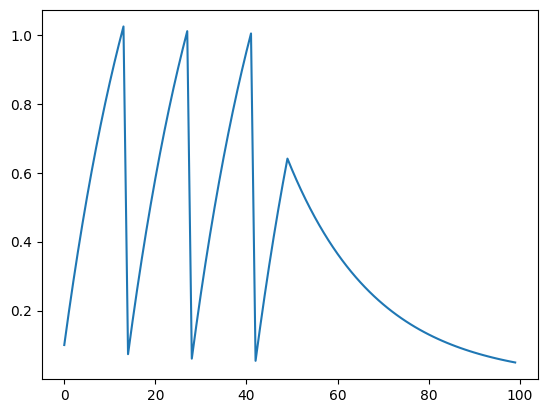

In [3]:
plt.plot(range(t_max), memList)

In [4]:
cfgs = {
    'RS': [[0.02,0.2,-65,8], [-70, -14]],
    'IB': [[0.02, 0.2, -55, 4], [-70, -14]],
    'CH': [[0.02, 0.2, -50,2], [-70, -14]],
    'LTS': [[0.02, 0.25, -65, 2], [-64.4, -16.1]],
    'TC': [[0.02, 0.25, -65, 0.05], [-64.4, -16.1]],
    'FS': [[0.1, 0.2, -65, 2], [-70, -14]],
    'RZ': [[0.1, 0.25, -65, 2], [-64.4, -16.1]]
}

cfg = cfgs['CH']
neuron = Izhikevich(*(cfg[0]), threshold=30)
vs, us = [], []
v,u = cfg[1]
t_max = 10000
input_ = np.array([0 if i < t_max/5 else 150 for i in range(t_max)])
spks = []
for i in range(t_max):
    spk, v,u= neuron(input_[i], v,u, time_resolution=30)
    spks.append(spk.numpy())
    vs.append(v.numpy()[0])
    us.append(u.numpy()[0])

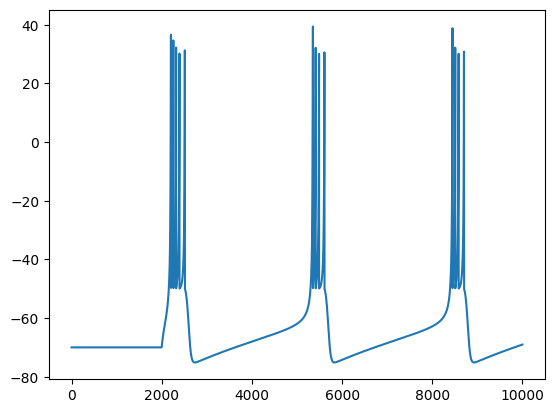

In [5]:
plt.plot(vs[:])

In [6]:
np.array(spks).sum()

13.0

In [7]:
neuron = IZH(*(cfg[0]), threshold=30)
#u,v = neuron.init_mem()
v,u = cfg[1]
neuron(torch.Tensor(np.array([0.0,0.5,0.5,4])),u,v)

(tensor([0., 0., 0., 0.]),
 tensor([-14., -14., -14., -14.]),
 tensor([-70., -70., -70., -70.]))

In [8]:
neuron = Izhikevich(*(cfg[0]), threshold=0.03)
#u,v = neuron.init_mem()
v,u = cfg[1]
neuron(torch.Tensor(np.array([0.0,0.5,0.5,4])),v,u)

(tensor([0., 0., 0., 0.]),
 tensor([-70.0000, -69.5000, -69.5000, -66.0000]),
 tensor([-14.]))

In [9]:
v,u = cfg[1]
neuron(torch.Tensor([input_[1]]), u, v)

(tensor([1.]), tensor([133.8400]), tensor([-68.6560]))

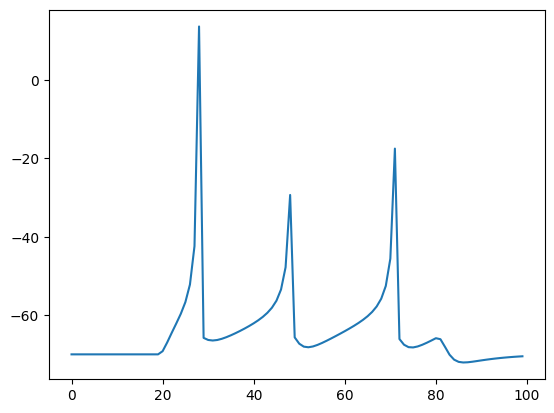

In [10]:
cfg = cfgs['FS']
neuron = IZH(*(cfg[0]), threshold=30, time_resolution=10)
vs, us = [], []
v,u = cfg[1]
t_max = 100
input_ = np.array([0 if (i < t_max/5 or i > t_max*4/5) else 1 for i in range(t_max)])
spks = []
for i in range(t_max):
    spk, u,v = neuron(torch.Tensor([input_[i]]), u,v)
    spks.append(spk.numpy())
    vs.append(v.numpy()[0])
    us.append(u.numpy()[0])
plt.plot(vs[:])

In [11]:
def simulateAndPlot(plot, neuron_type: str = 'RS', t_max: int = 1000):
    vs, us = [], []
    v = 0
    resolution = 1
    if(neuron_type == 'Leaky'):
        t_max = t_max//resolution
        input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else 0.06 for i in range(t_max)])
        neuron = Leaky(0.95)
        for i in range(t_max):
            spk, v = neuron(input_[i], v)
            vs.append(v)
        plot.plot(vs)
    else:
        input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else 1 for i in range(t_max)])
        cfg = cfgs[neuron_type]
        neuron = IZH(*(cfg[0]), threshold=30, time_resolution=10)
        v,u = cfg[1]
        spks = []

        for i in range(t_max):
            spk, u, v= neuron(input_[i], u,v )
            spks.append(spk.numpy())
            vs.append(v.numpy())
            us.append(u.numpy())
        plot.plot(np.linspace(0,t_max/resolution, t_max) , vs)
    plot.set_title(neuron_type)
    plot.set_xlabel("time in ms")
    plot.set_ylabel("Memrane voltage in mV")


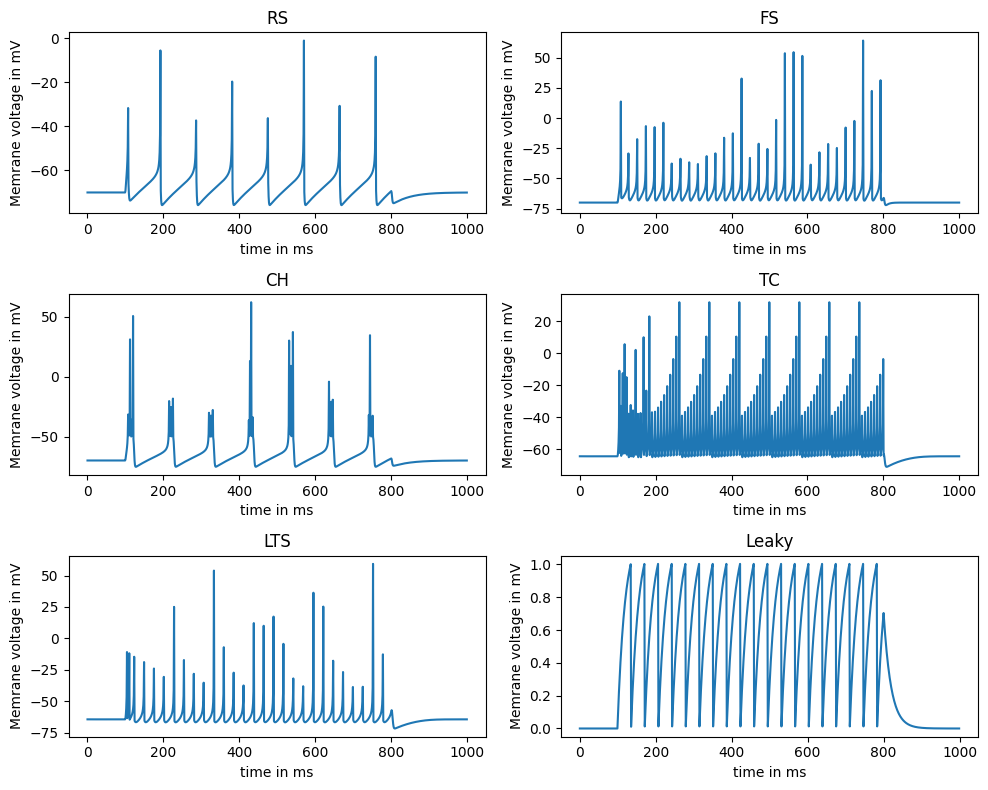

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

neuronList = ['RS','FS', 'CH','TC','LTS', 'Leaky']
i = 0
for row in axes:
    for plot in row:
        simulateAndPlot(plot, neuron_type=neuronList[i])
        i += 1

plt.tight_layout()
plt.show()

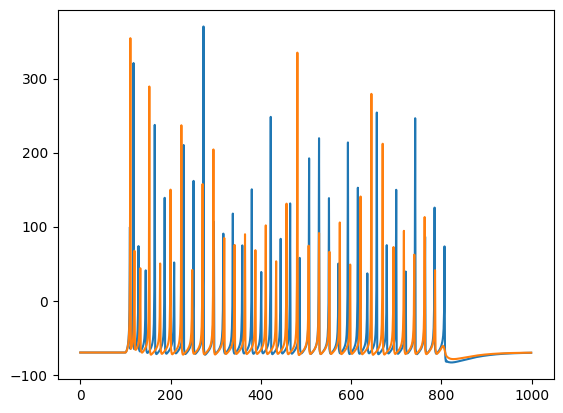

In [13]:
cfg = cfgs['RS']
neuron = IZH(*(cfg[0]), threshold=30, time_resolution=1)
vs1, us1 = [], []
vs2, us2 = [], []
v,u = cfg[1]
t_max = 1000
#input_ = np.array([0 if (i < t_max/5 or i > t_max*4/5) else 30 for i in range(t_max)])
input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else 5 for i in range(t_max)])

spks = []
for i in range(t_max):
    spk, u,v = neuron(torch.Tensor([input_[i],input_[i]*0.9]), u,v)
    spks.append(spk.numpy())
    vs1.append(v.numpy()[0])
    us1.append(u.numpy()[0])
    vs2.append(v.numpy()[1])
    us2.append(u.numpy()[1])
plt.plot(vs1[:])
plt.plot(vs2[:])

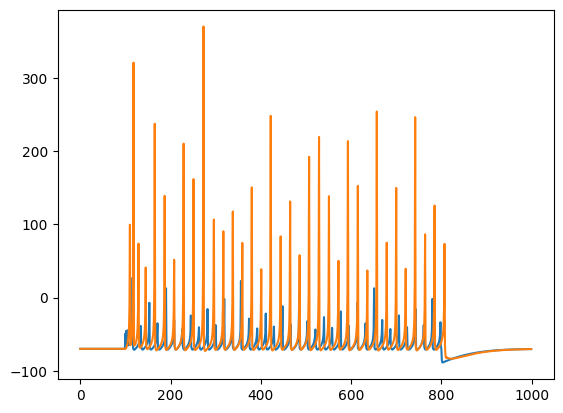

In [14]:
cfg = cfgs['RS']
neuron = IZH(*(cfg[0]), threshold=30, time_resolution=100)
vs, us = [], []
v,u = cfg[1]
t_max = 1000
#input_ = np.array([0 if (i < t_max/5 or i > t_max*4/5) else 30 for i in range(t_max)])
input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else 5 for i in range(t_max)])

spks = []
for i in range(t_max):
    spk, u,v = neuron(torch.Tensor([input_[i]]), u,v)
    spks.append(spk.numpy())
    vs.append(v.numpy()[0])
    us.append(u.numpy()[0])
plt.plot(vs[:])
plt.plot(vs1[:])

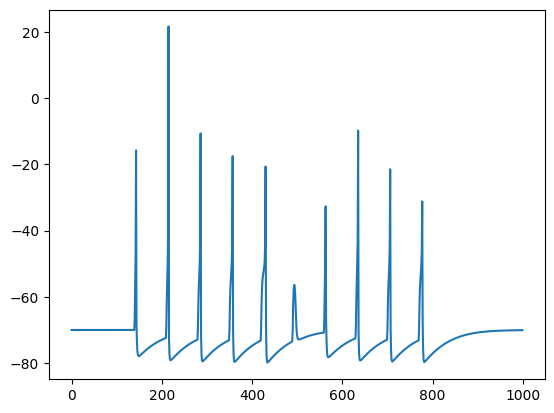

In [38]:
cfg = cfgs['RS']
neuron = IZH(*(cfg[0]), threshold=30, time_resolution=10, alpha=0.95, beta=0.8)
v,u = cfg[1]
t_max = 1000
input_ = np.array([0 if (i < t_max/10 or i > t_max*4/5) else (i%70 == 0)*2.5 for i in range(t_max)])
vs1, us1 = [], []
vs2, us2 = [], []

i_list = []
spks = []
for i in range(t_max):
    spk, u,v = neuron(torch.Tensor([input_[i],input_[i]*0.9]), u,v)
    spks.append(spk.numpy())
    vs1.append(v.numpy()[0])
    us1.append(u.numpy()[0])
    vs2.append(v.numpy()[1])
    us2.append(u.numpy()[1])
plt.plot(vs1[:])